In [1]:
import pandas as pd

data = pd.read_csv("one_hot_encoded_data.csv", index_col=[0])

In [2]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [3]:
X = data.drop(columns=["loan_status"])
y = data["loan_status"]

# data["loan_status"] = data["loan_status"].astype("category")
# category = data["loan_status"].cat.categories

# y = data["loan_status"].cat.codes
print("y.unique() is ", y.unique())
# category
# category[y]

y.unique() is  ['Current' 'Fully Paid' 'Late (31-120 days)' 'Late (16-30 days)'
 'In Grace Period' 'Charged Off' 'Default']


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)



gbm0 = GradientBoostingClassifier(random_state=666)
gbm0.fit(X_train, y_train)
y_pred = gbm0.predict(X_test)
y_predprob = gbm0.predict_proba(X)[:,1]

c:\program files\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## confusion matrix

In [5]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np

%matplotlib inline
def plot_confusion_matrix(y_true, y_pred, fig_name,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(fig_name)
    return ax

Confusion matrix, without normalization
[[  103     0     0     1     0     0     0]
 [    0 23546     0     0     8     2     6]
 [    0     1     0     0     0     0     0]
 [    0     0     0  1470     0     0     0]
 [    0   141     0     0     5     1     6]
 [    0    49     0     0     3     1    11]
 [    0    43     0     0     2     0   240]]


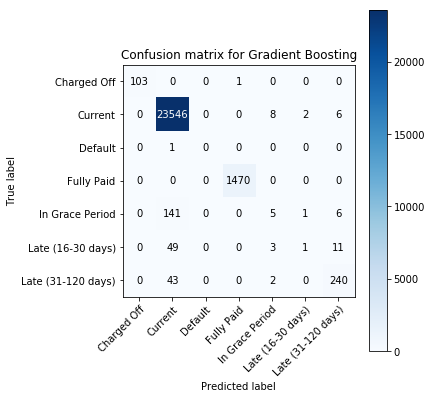

In [6]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plot_confusion_matrix(y_test, y_pred, 
                      title='Confusion matrix for Gradient Boosting',fig_name='XGBoosting confusion matrix .png')

plt.show()

In [7]:
def calculator(TP, TN, FP, FN):
    ACC = (TP + TN) / (TP + TN + FP + FN)
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    return round(ACC,5)*100, round(TPR,5)*100, round(TNR,5)*100, round(FPR,5)*100, round(FNR,5)*100

    
print("Charged off")
print(calculator(103, 23546+1470+5+1+240, 0, 1+141+49+43+2+3+1+6+11+8+2+6+1))
   
    
print("Current")
print(calculator(23546, 103+1470+5+1+240, 1+141+49+43, 1+8+3+2+1+2+6+6+11))

print("Default")
print(calculator(0, 103+23546+1470+5+1+240, 0, 1+141+49+43+1+8+3+2+1+2+6+6+11))


print(" Fully Paid")
print(calculator(1470, 103+23546+5+1+240, 1, 141+49+43+1+8+3+2+1+2+6+6+11))


print(" In Grace Period")
print(calculator(5, 103+23546+1470+1+240, 2+3+8, 141+49+43+1+1+2+6+6+11))


print("Late (16-30)")
print(calculator(1, 103+23546+1470+5+240, 1+2, 1+141+49+43+1+8+3+2+6+6+11))


print("Late (31-120)")
print(calculator(240, 103+23546+1470+5+1, 11+6+6, 1+141+49+43+1+8+3+2+1+2))


Charged off
(98.931, 27.321, 100.0, 0.0, 72.679)
Current
(98.931, 99.83, 88.602, 11.398, 0.16999999999999998)
Default
(98.931, 0.0, 100.0, 0.0, 100.0)
 Fully Paid
(98.931, 84.33699999999999, 99.996, 0.004, 15.662999999999998)
 In Grace Period
(98.935, 1.8870000000000002, 99.949, 0.051000000000000004, 98.113)
Late (16-30)
(98.931, 0.368, 99.988, 0.012, 99.632)
Late (31-120)
(98.931, 48.88, 99.909, 0.091, 51.12)


# ROC

<Figure size 432x288 with 0 Axes>

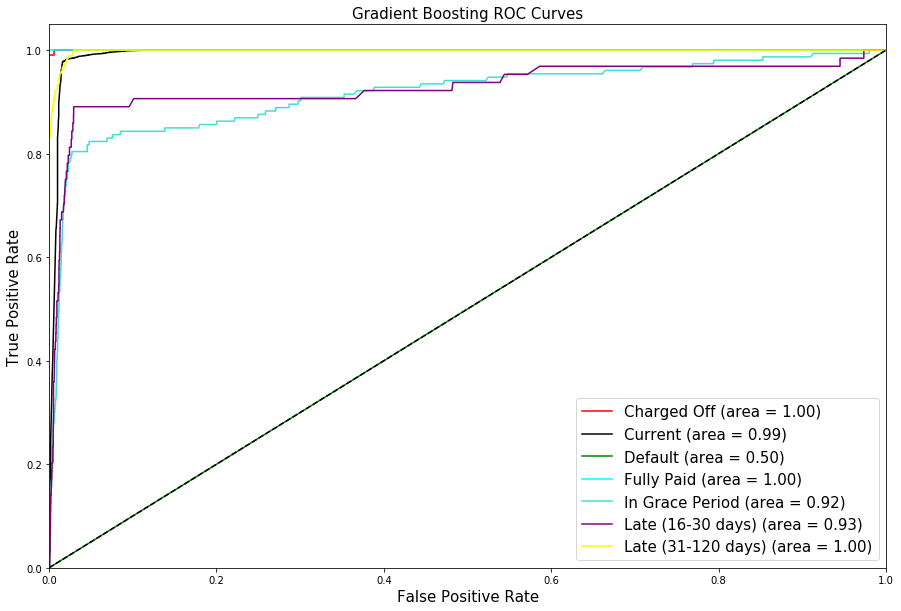

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

target_ary = label_binarize(y_test, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])

clf = OneVsRestClassifier(GradientBoostingClassifier(random_state=666))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(target_ary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize=(15,10))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{} (area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Gradient Boosting ROC Curves',fontsize=15)
plt.legend(loc="lower right",fontsize=15)

plt.show()
fig.savefig('Gradient Boosting ROC.png')